In [172]:
import pandas as pd

### Scraping the batting data from ESPN STATS GURU and Data Preperation

In [173]:
appended_df_bat = []
for i in range(1,46):
    link="https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;page={};template=results;type=batting".format(i)
    data = pd.read_html(link)[2]
    appended_df_bat.append(data)
df_bat = pd.concat(appended_df_bat)

In [175]:
df_bat = df_bat.drop('Unnamed: 15', 1)

In [176]:
df_bat=df_bat.replace('-',0)

In [177]:
df_bat=df_bat[df_bat['Inns'].astype(int)>10]
df_bat=df_bat[df_bat['Runs'].astype(int)>200]

In [179]:
df_bat['50+']=df_bat['100']+df_bat['50']
df_bat['Boundaries']=df_bat['4s']+df_bat['6s']

In [180]:
df_bat=df_bat[['Player','Inns','NO','Ave','SR','50+','Boundaries']]

In [182]:
df_bat['Inns']=df_bat['Inns'].astype(float)
df_bat['NO']=df_bat['NO'].astype(float)
df_bat['Ave']=df_bat['Ave'].astype(float)
df_bat['SR']=df_bat['SR'].astype(float)
df_bat['50+']=df_bat['50+'].astype(float)
df_bat['Boundaries']=df_bat['Boundaries'].astype(float)

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [183]:
def normalize_series(s):
    return (s - s.min()) / (s.max() - s.min())

In [184]:
df_bat['Inns'] = normalize_series(df_bat['Inns'])
df_bat['NO'] = normalize_series(df_bat['NO'])
df_bat['Ave'] = normalize_series(df_bat['Ave'])
df_bat['SR'] = normalize_series(df_bat['SR'])
df_bat['50+'] =normalize_series(df_bat['50+'])
df_bat['Boundaries'] = normalize_series(df_bat['Boundaries'])

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [186]:
df_bat['rank']=(0.1*df_bat['Inns'])+ (0.05*df_bat['NO'])+ (0.25*df_bat['Ave'])+ (0.25*df_bat['SR'])+ (0.15*df_bat['50+'])+(0.2*df_bat['Boundaries'])  

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
df_bat=df_bat[['Player','rank']]

In [188]:
df_bat=df_bat.sort_values(['rank'],ascending=False)

In [189]:
lst=df_bat['Player'].tolist()

In [190]:
result=[]
n = 5
for i in range(len(lst)-n+1):
    batch = lst[i:i+n]
    result.append(batch)

### Scraping the bowling data from ESPN STATS GURU and Data Preperation

In [191]:
appended_df_bowl = []
for i in range(1,46):
    link="https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;page={};template=results;type=bowling".format(i)
    data = pd.read_html(link)[2]
    appended_df_bowl.append(data)
df_bowl = pd.concat(appended_df_bowl)

In [192]:
df_bowl.head(1)

Player       Span  Mat Inns  Overs Mdns  Runs Wkts  BBI    Ave  \
0  SL Malinga (SL)  2006-2020   84   83  299.5    1  2225  107  5/6  20.79   

   Econ    SR  4  5  Unnamed: 14  
0  7.42  16.8  1  2          NaN

In [193]:
df_bowl = df_bowl.drop('Unnamed: 14', 1)

In [194]:
df_bowl=df_bowl[df_bowl['Mat']>=10]

In [195]:
df_bowl=df_bowl.replace('-',0)

In [248]:
df_bowl=df_bowl[df_bowl['Inns']>10]

In [197]:
df_bowl=df_bowl[df_bowl['Wkts']>20]

In [199]:
df_bowl['4+']=df_bowl['4']+df_bowl['5']

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
df_bowl=df_bowl[['Player','Inns','Wkts','Ave','Econ','SR','4+']]

In [201]:
df_bowl['Inns']=df_bowl['Inns'].astype(float)
df_bowl['Wkts']=df_bowl['Wkts'].astype(float)
df_bowl['Ave']=df_bowl['Ave'].astype(float)
df_bowl['Econ']=df_bowl['Econ'].astype(float)
df_bowl['SR']=df_bowl['SR'].astype(float)
df_bowl['4+']=df_bowl['4+'].astype(float)

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [203]:
df_bowl['Inns'] = normalize_series(df_bowl['Inns'])
df_bowl['Wkts'] = normalize_series(df_bowl['Wkts'])
df_bowl['Ave'] = normalize_series(df_bowl['Ave'])
df_bowl['Econ'] = normalize_series(df_bowl['Econ'])
df_bowl['SR'] =normalize_series(df_bowl['SR'])
df_bowl['4+'] = normalize_series(df_bowl['4+'])

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [205]:
df_bowl['Ave']=1-df_bowl['Ave']
df_bowl['Econ']=1-df_bowl['Econ']
df_bowl['SR']=1-df_bowl['SR']

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [207]:
df_bowl['rank']=(0.05*df_bowl['Inns'])+ (0.1*df_bowl['Wkts'])+ (0.25*df_bowl['Ave'])+ (0.25*df_bowl['Econ'])+ (0.25*df_bowl['SR'])+(0.1*df_bowl['4+'])  

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
df_bowl=df_bowl[['Player','rank']]

In [210]:
df_bowl=df_bowl.sort_values(['rank'],ascending=False)

In [212]:
lst=df_bowl['Player'].tolist()

In [213]:
result_1=[]
n = 5
for i in range(len(lst)-n+1):
    batch = lst[i:i+n]
    result_1.append(batch)

### Training the model 

In [215]:
len(result+result_1)

538

In [216]:
data_train=result+result_1

In [217]:
data_train=data_train*100

In [218]:
from gensim.models import Word2Vec

In [219]:
model = Word2Vec(sentences=data_train, size=300, window=5, min_count=1, workers=4)

### W2V Visualization

In [278]:
keys = ['DA Warner (AUS)','AB de Villiers (SA)','TA Boult (NZ)','R Ashwin (INDIA)','JDS Neesham (NZ)','FA Allen (WI)']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [309]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [310]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

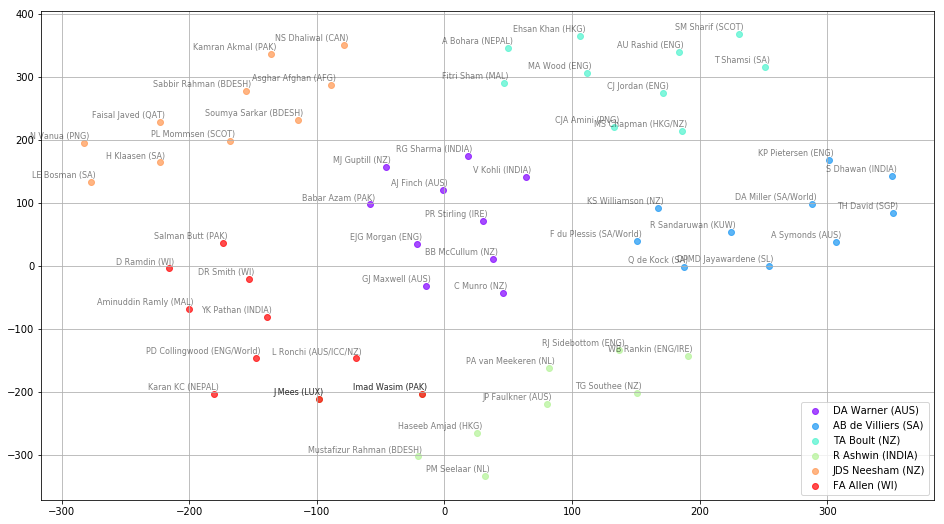

In [313]:
keys = ['DA Warner (AUS)','AB de Villiers (SA)','TA Boult (NZ)','R Ashwin (INDIA)','JDS Neesham (NZ)','FA Allen (WI)']

tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters, 0.7)

#### Let's ask the model to find the most similar player

In [302]:
print(model.wv.most_similar(positive=['AB de Villiers (SA)'])[0][0])

A Symonds (AUS)


In [303]:
print(model.wv.most_similar(positive=['JM Bairstow (ENG)','MS Dhoni (INDIA)'])[0][0])

DP Conway (NZ)


In [304]:
print(model.wv.most_similar(positive=['RG Sharma (INDIA)','RA Jadeja (INDIA)'])[0][0])

Babar Azam (PAK)


#### Analogy difference : Which player is to Jos Buttler as Gayle is to Rahane?

In [305]:
print(model.wv.most_similar(positive=['JC Buttler (ENG)','CH Gayle (WI)'],negative=['AM Rahane (INDIA)'])[0][0])

KL Rahul (INDIA)


In [306]:
print(model.wv.most_similar(positive=['Mohammad Sami (PAK)','SL Malinga (SL)'],negative=['DW Steyn (SA)'])[0][0])

SW Tait (AUS)


#### Odd One Out

In [307]:
print(model.wv.doesnt_match(['V Kohli (INDIA)','RG Sharma (INDIA)','JE Root (ENG)']))

JE Root (ENG)
